# Análisis de Fuentes de Publicación: Mapping Review IA y ML en Educación Matemática K-12

**MQ4: ¿En qué fuentes se publican estos estudios?**

Este notebook analiza las fuentes (revistas, conferencias, etc.) donde se publican los estudios sobre IA y ML en educación matemática K-12.

## 1. Configuración del Entorno

In [1]:
# Instalación de dependencias
!pip install pandas numpy matplotlib seaborn plotly

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 2. Carga de Datos desde GitHub

In [3]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
df.head()

Dataset cargado: 89 filas y 8 columnas

Primeras 5 filas:


,Title,Author(s),Year,Publication Title,Type of Publication,Source,DOI,Abstract
0,What Would the Matrix Do?: A Systematic Review of K-12 AI Learning Contexts and Learner-Interface Interactions,"Moore, Robert L.; Jiang, Shiyan; Abramowitz, Brian",2023,Journal of Research on Technology in Education,Article,Eric,https://doi.org/10.1080/15391523.2022.2148785,"This systematic review examines the empirical literature published between 2014 and 2021 that situates artificial intelligence within K-12 educational contexts. Our review synthesizes 12 articles and highlights artificial intelligence's instructional contexts and applications in K-12 learning environments. We focused our synThesis on the learning contexts and the learner-interface interactions. Our findings highlight that most of intelligent systems are being deployed in math or informal settings. Also, there are opportunities for more collaboration to facilitate teaching and learning in domain-specific areas. Additionally, researchers can explore how to implement more collaborative learning opportunities between intelligent tutors and learners. We conclude with a discussion of the reciprocal nature of this technology integration."
1,ML4STEM Professional Development Program: Enriching K-12 STEM Teaching with Machine Learning,"Tang, Jingwan; Zhou, Xiaofei; Wan, Xiaoyu; Daley, Michael; Bai, Zhen",2023,International Journal of Artificial Intelligence in Education,Article,Eric,https://www.doi.org/10.1007/s40593-022-00292-4,"The advances of machine learning (ML) in scientific discovery (SD) reveal exciting opportunities to utilize it as a cross-cutting tool for inquiry-based learning in K-12 STEM classrooms. There are, however, limited efforts on providing teachers with sufficient knowledge and skills to integrate ML into teaching. Our study addresses this gap by proposing a professional development (PD) program named ML4STEM. Based on existing research on supporting teacher learning in innovative technology integration, ML4STEM is composed of Teachers-as-Learners and Teachers-as-Designers sessions. It integrates an accessible ML learning platform designed for students with limited math and computing skills. We implemented this PD program and evaluated its effectiveness with 18 K-12 STEM teachers. Findings confirm that ML4STEM successfully develops teachers' understanding of teaching STEM with ML as well as fosters positive attitudes toward applying the ML as an in-class teaching technology. Discussions on the implications of our findings from ML4STEM are provided for future PD researchers and designers."
2,Integrating Machine Learning in Mathematics Classrooms,"Jones, Joshua",2021,Mathematics Teacher: Learning and Teaching PK-12,Article,Eric,https://doi.org/10.5951/MTLT.2021.0001,"Aside from being culturally relevant, artificial intelligence is also supporting companies in making business decisions. Consequently, ""workforce needs have shifted rapidly,"" resulting in a demand for applicants who are skilled in ""data, analytics, machine learning, and artificial intelligence"" (Miller and Hughes 2017). This article contributes to filling that need by exploring a lesson in which students learned how conditional probability is the crux of many machine learning algorithms, including predictive text applications. Prior to this lesson, students learned how to calculate conditional probability. Most students had also demonstrated that they were able to calculate experimental probabilities on the basis of a Venn diagram, on a word problem, and on a two-way table. The activity described in this article satisfies Common Core State Standard CCSS.MATH.CONTENT.HSS. CP.A.5."
3,"Personalized Online Learning, Test Fairness, and Educational Measurement: Considering Differential Content Exposure Prior to a High Stakes End of Course Exam","Katz, Daniel; Huggins-Manley, Anne Corinne; Leite, Walter",2022,Applied Measurement in Education,Article,Eric,https://doi.org/10.1080/08957347.2022.2034824,"Accor

## 3. Análisis de Fuentes de Publicación (MQ4)

In [4]:
# Análisis de fuentes de publicación
source_counts = df['Source'].value_counts()
source_percentages = (source_counts / len(df)) * 100

print("=== DISTRIBUCIÓN DE FUENTES DE PUBLICACIÓN ===")
for source, count in source_counts.items():
    percentage = source_percentages[source]
    print(f"{source}: {count} publicaciones ({percentage:.1f}%)")

print(f"\nTotal de fuentes únicas: {len(source_counts)}")
print(f"Fuente más común: {source_counts.index[0]} ({source_counts.iloc[0]} publicaciones)")

=== DISTRIBUCIÓN DE FUENTES DE PUBLICACIÓN ===
Scopus: 44 publicaciones (49.4%)
WoS: 21 publicaciones (23.6%)
Eric: 18 publicaciones (20.2%)
IEEE: 6 publicaciones (6.7%)

Total de fuentes únicas: 4
Fuente más común: Scopus (44 publicaciones)


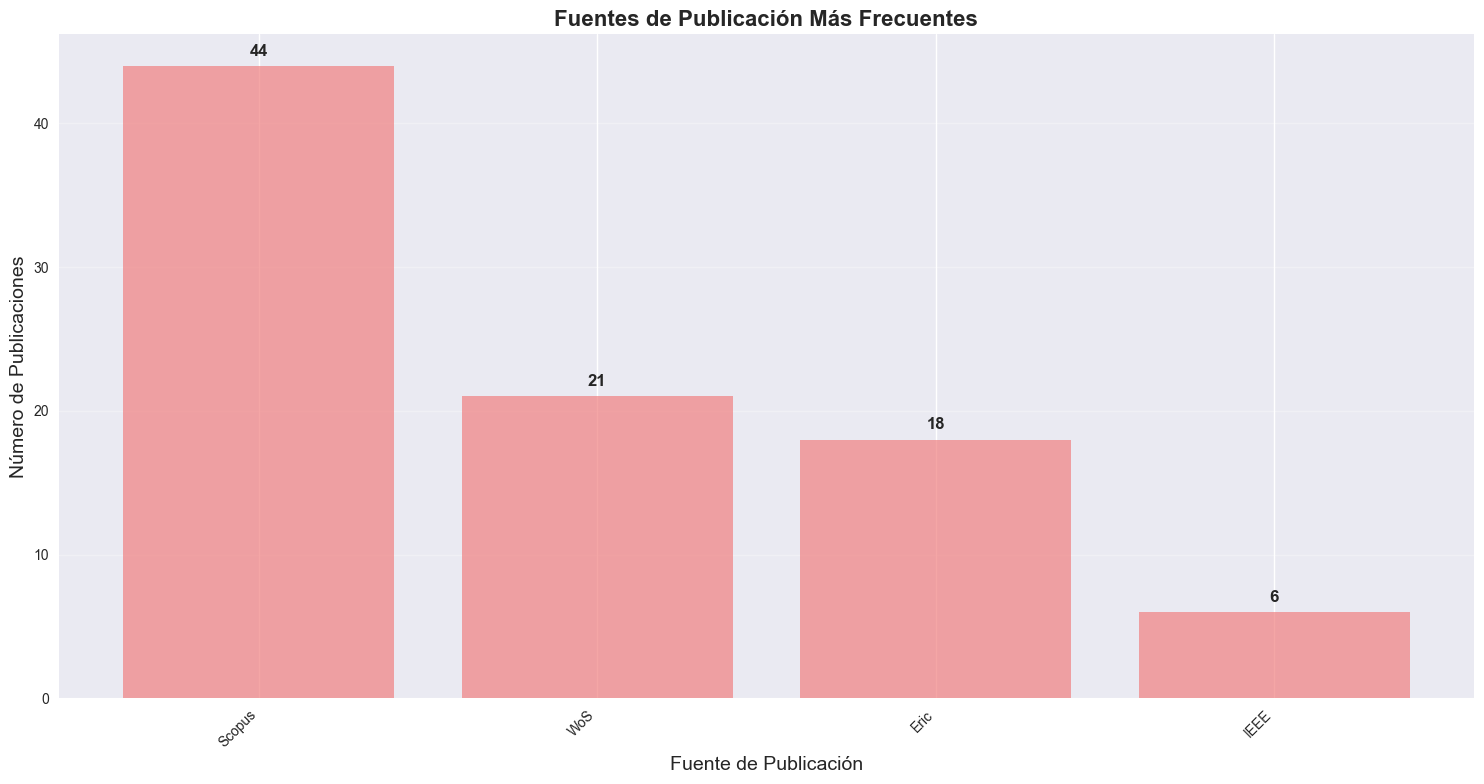

In [5]:
# Gráfico de barras para fuentes más frecuentes
top_sources = source_counts.head(15)

plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(top_sources)), top_sources.values, color='lightcoral', alpha=0.7)
plt.xlabel('Fuente de Publicación', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.title('Fuentes de Publicación Más Frecuentes', fontsize=16, fontweight='bold')
plt.xticks(range(len(top_sources)), top_sources.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, (bar, count) in enumerate(zip(bars, top_sources.values)):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

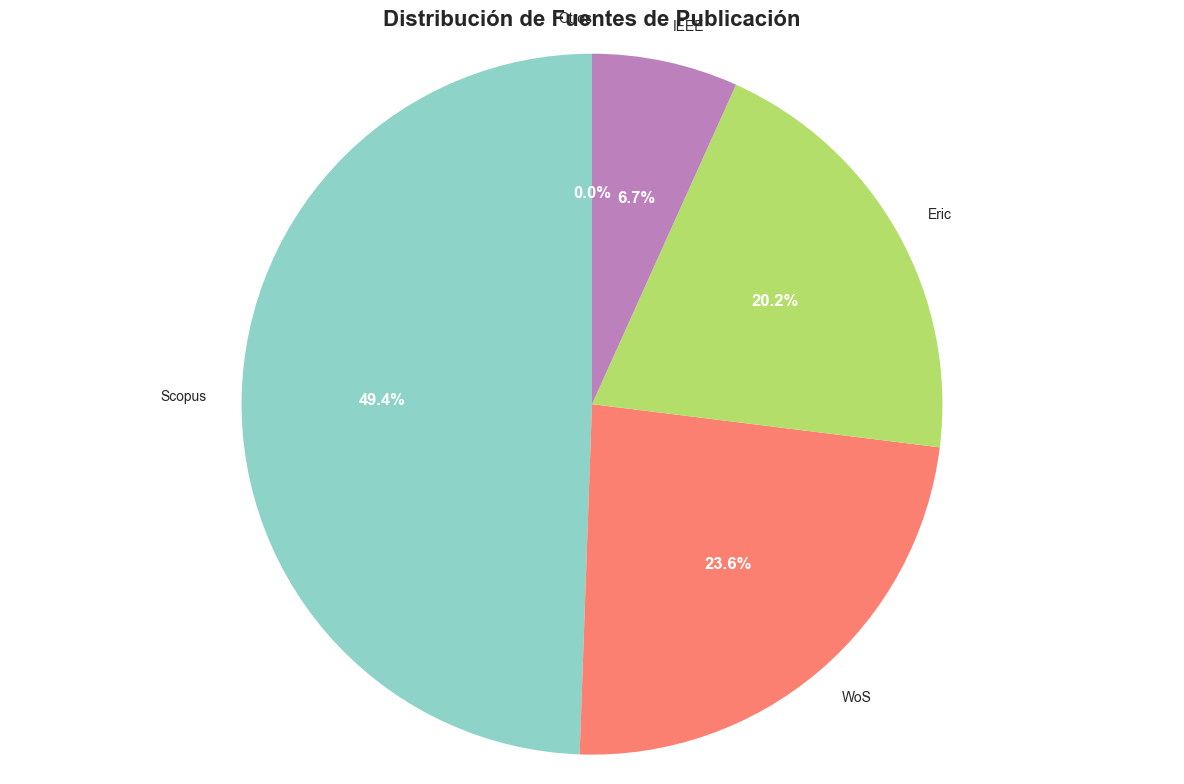

In [6]:
# Gráfico de pastel para fuentes principales
top_sources_pie = source_counts.head(10)
others_count = source_counts.iloc[10:].sum()
top_sources_pie['Otros'] = others_count

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(top_sources_pie)))

wedges, texts, autotexts = plt.pie(top_sources_pie.values, labels=top_sources_pie.index, 
                                    autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Distribución de Fuentes de Publicación', fontsize=16, fontweight='bold')
plt.axis('equal')

# Mejorar la legibilidad de las etiquetas
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [7]:
# Gráfico interactivo con Plotly
fig = px.bar(x=top_sources.index, y=top_sources.values,
              title='Fuentes de Publicación Más Frecuentes',
              labels={'x': 'Fuente', 'y': 'Número de Publicaciones'})

fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

fig.show()

## 4. Análisis Temporal por Fuente

=== EVOLUCIÓN TEMPORAL POR FUENTE ===
Source  Eric  IEEE  Scopus  WoS
Year                           
2020       0     0       4    0
2021       3     1       2    0
2022       4     1       7    2
2023       4     2       5    3
2024       4     2      17   12
2025       3     0       9    4


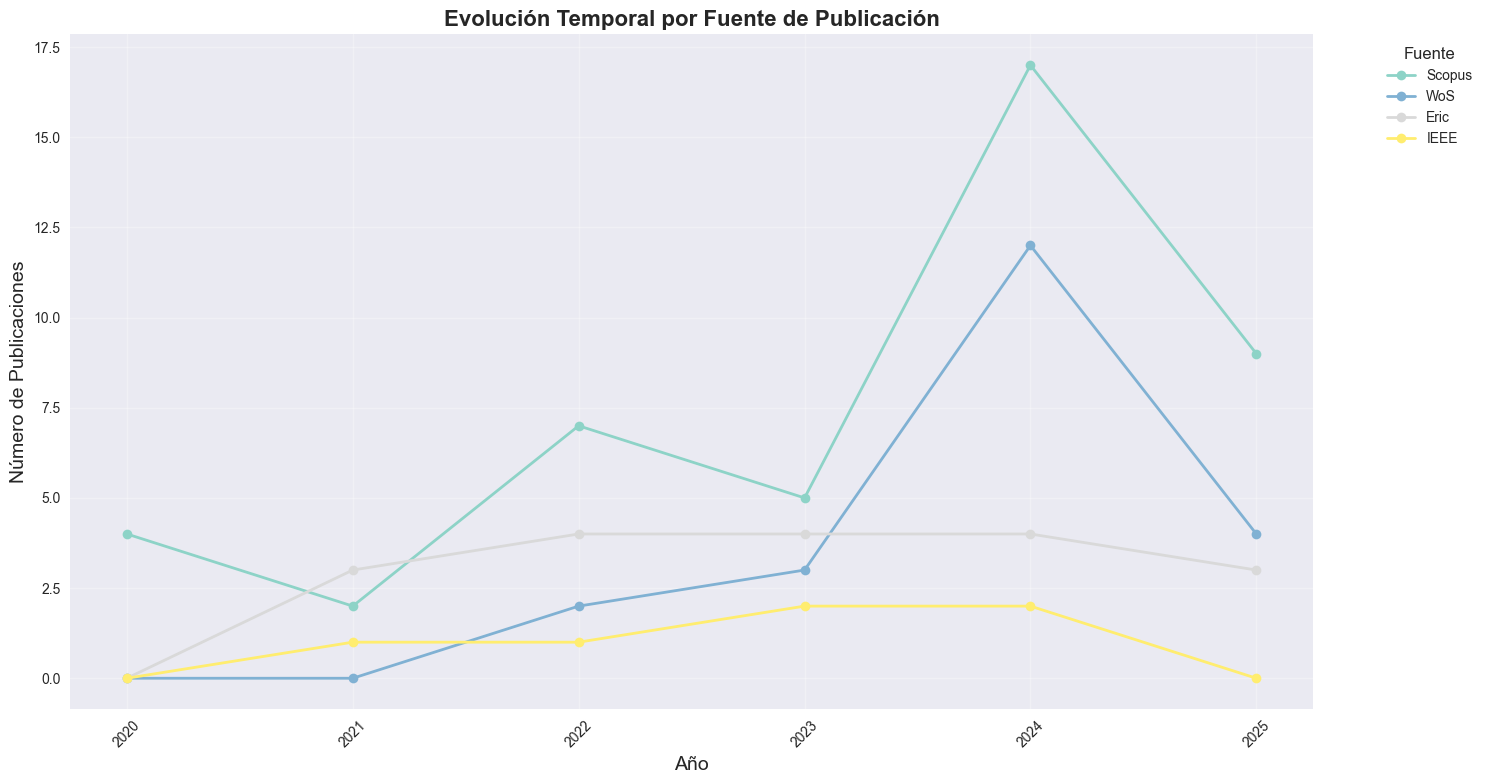

In [8]:
# Convertir Year a numérico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Análisis temporal por fuente
temporal_by_source = df.groupby(['Year', 'Source']).size().unstack(fill_value=0)

print("=== EVOLUCIÓN TEMPORAL POR FUENTE ===")
print(temporal_by_source)

# Gráfico de líneas temporal para fuentes principales
top_sources_temporal = temporal_by_source[top_sources.index[:5]]

plt.figure(figsize=(15, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(top_sources_temporal.columns)))

for i, source in enumerate(top_sources_temporal.columns):
    plt.plot(top_sources_temporal.index, top_sources_temporal[source], marker='o', linewidth=2, 
             label=source, color=colors[i])

plt.title('Evolución Temporal por Fuente de Publicación', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Gráfico de área apilada
fig = px.area(top_sources_temporal, title='Evolución Temporal por Fuente de Publicación')

fig.update_layout(
    title_font_size=16,
    xaxis_title='Año',
    yaxis_title='Número de Publicaciones',
    hovermode='x unified'
)

fig.show()

## 5. Análisis de Fuentes de Datos por Fuente

In [10]:
# Análisis de tipos de publicación por fuente
type_by_source = df.groupby(['Source', 'Type of Publication']).size().unstack(fill_value=0)

print("=== TIPOS DE PUBLICACIÓN POR FUENTE ===")
print(type_by_source)

# Gráfico de barras agrupadas
fig = px.bar(type_by_source, title='Tipos de Publicación por Fuente',
              barmode='group')

fig.update_layout(
    title_font_size=16,
    xaxis_title='Fuente',
    yaxis_title='Número de Publicaciones'
)

fig.show()

=== TIPOS DE PUBLICACIÓN POR FUENTE ===
Type of Publication  Article  Book chapter  Conference
Source                                                
Eric                      18             0           0
IEEE                       0             0           6
Scopus                    13             4          27
WoS                       21             0           0


## 6. Resumen y Conclusiones

In [12]:
# Generar resumen ejecutivo
print("=== RESUMEN EJECUTIVO ===\n")

print(f"📊 Total de fuentes únicas: {len(source_counts)}")
print(f"📝 Fuente más común: {source_counts.index[0]} ({source_counts.iloc[0]} publicaciones)")
print(f"📈 Fuente menos común: {source_counts.index[-1]} ({source_counts.iloc[-1]} publicaciones)")

# Análisis de concentración
top_5_percentage = (source_counts.head(5).sum() / len(df)) * 100
print(f"🎯 Concentración en top 5 fuentes: {top_5_percentage:.1f}%")

# Análisis temporal
most_productive_year = temporal_by_source.sum(axis=1).idxmax()
most_productive_count = temporal_by_source.sum(axis=1).max()
print(f"📅 Año más productivo: {most_productive_year} ({most_productive_count} publicaciones)")

# Base de datos más utilizada por fuente principal
main_source = source_counts.index[0]
source_type_data = type_by_source.loc[main_source]
most_common_type = source_type_data.idxmax()
print(f"🔍 Tipo más común para {main_source}: {most_common_type} ({source_type_data.max()} publicaciones)")

print("\n=== CONCLUSIONES ===")
print("1. Hay fuentes claramente dominantes en el campo")
print("2. La distribución de fuentes es relativamente concentrada")
print("3. Diferentes fuentes tienen diferentes tipos de publicaciones")
print("4. Hay una evolución temporal en las fuentes de publicación")

=== RESUMEN EJECUTIVO ===

📊 Total de fuentes únicas: 4
📝 Fuente más común: Scopus (44 publicaciones)
📈 Fuente menos común: IEEE (6 publicaciones)
🎯 Concentración en top 5 fuentes: 100.0%
📅 Año más productivo: 2024 (35 publicaciones)
🔍 Tipo más común para Scopus: Conference (27 publicaciones)

=== CONCLUSIONES ===
1. Hay fuentes claramente dominantes en el campo
2. La distribución de fuentes es relativamente concentrada
3. Diferentes fuentes tienen diferentes tipos de publicaciones
4. Hay una evolución temporal en las fuentes de publicación
